## build a model to predict if person would survive or not base on pclass, sex, age, fare

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
new_df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]
new_df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [28]:
sex_dummies = pd.get_dummies(new_df.Sex, prefix="sex")
sex_dummies.head()

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
df_with_dummies = pd.concat([new_df,sex_dummies],axis='columns')
df_with_dummies.head()

,Pclass,Sex,Age,Fare,Survived,sex_female,sex_male
0,3,male,22.0,7.2500,0,0,1
1,1,female,38.0,71.2833,1,1,0
2,3,female,26.0,7.9250,1,1,0
3,1,female,35.0,53.1000,1,1,0
4,3,male,35.0,8.0500,0,0,1


In [30]:
target = df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
df_with_dummies.drop(['Sex','Survived'],axis='columns',inplace=True)
df_with_dummies.head()

,Pclass,Age,Fare,sex_female,sex_male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [41]:
df_with_dummies[df_with_dummies.Age.isna()]

,Pclass,Age,Fare,sex_female,sex_male
5,3,NaN,8.4583,0,1
17,2,NaN,13.0000,0,1
19,3,NaN,7.2250,1,0
26,3,NaN,7.2250,0,1
28,3,NaN,7.8792,1,0
...,...,...,...,...,...
859,3,NaN,7.2292,0,1
863,3,NaN,69.5500,1,0
868,3,NaN,9.5000,0,1
878,3,NaN,7.8958,0,1


In [43]:
mean_age = df_with_dummies.Age.mean()
mean_age

29.69911764705882

In [44]:
import math

In [50]:
df_with_dummies.Age = df_with_dummies.Age.fillna(math.floor(mean_age))
df_with_dummies[df_with_dummies.Age.isna()]

,Pclass,Age,Fare,sex_female,sex_male


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_with_dummies, target, test_size=0.3)
X_train.shape

(623, 5)

In [60]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [61]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
model.score(X_test, y_test)

0.8432835820895522

In [65]:
model.predict([X_test.iloc[5]])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [67]:
cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)

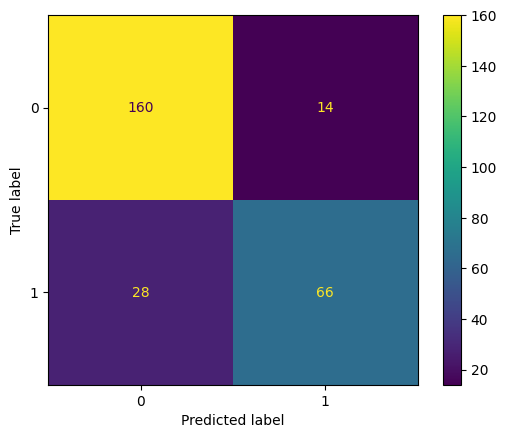

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()